<a href="https://colab.research.google.com/github/jackliusr/data-science/blob/main/image-processing/inpaint_from_small.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# replace ROI with corresponding small image

In [6]:
! wget -O small.jpg https://i.i-sgcm.com/new_cars/cars/12476/12476_g68.jpg
! wget -O big-wm.jpg https://i.i-sgcm.com/new_cars/cars/12476/12476_g68_b.jpg

--2021-05-05 12:59:38--  https://i.i-sgcm.com/new_cars/cars/12476/12476_g68.jpg
Resolving i.i-sgcm.com (i.i-sgcm.com)... 152.199.1.124
Connecting to i.i-sgcm.com (i.i-sgcm.com)|152.199.1.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38176 (37K) [image/jpeg]
Saving to: ‘small.jpg’

small.jpg           100%[===================>]  37.28K  --.-KB/s    in 0s      

2021-05-05 12:59:38 (188 MB/s) - ‘small.jpg’ saved [38176/38176]

--2021-05-05 12:59:38--  https://i.i-sgcm.com/new_cars/cars/12476/12476_g68_b.jpg
Resolving i.i-sgcm.com (i.i-sgcm.com)... 152.199.1.124
Connecting to i.i-sgcm.com (i.i-sgcm.com)|152.199.1.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108236 (106K) [image/jpeg]
Saving to: ‘big-wm.jpg’

big-wm.jpg          100%[===================>] 105.70K  --.-KB/s    in 0.02s   

2021-05-05 12:59:38 (6.63 MB/s) - ‘big-wm.jpg’ saved [108236/108236]



# imports

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import urllib

In [7]:
start = (630, 575)
end = (30, 336)


In [8]:
img_wm = cv.imread("big-wm.jpg")
img_s = cv.imread("small.jpg")


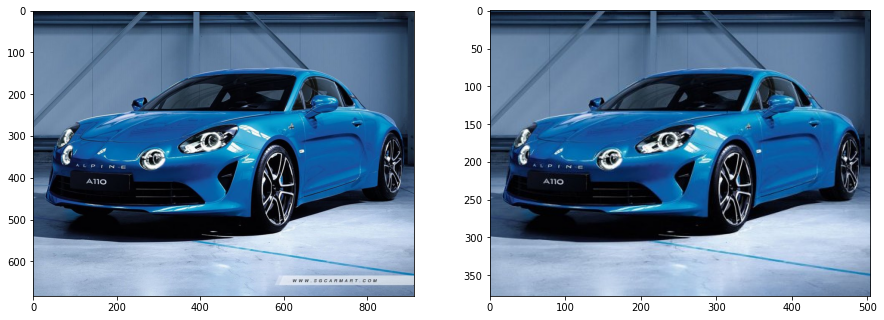

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(cv.cvtColor(img_wm, cv.COLOR_BGR2RGB))
ax2.imshow(cv.cvtColor(img_s, cv.COLOR_BGR2RGB))
plt.show()

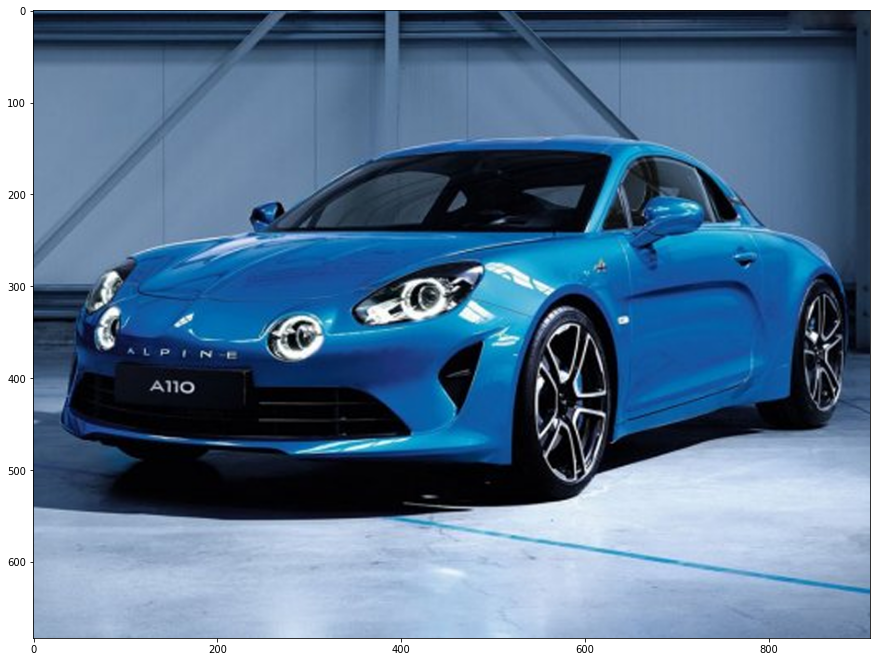

In [14]:
height, width = img_wm.shape[:2]
img_b = cv.resize(img_s,( width,height), interpolation = cv.INTER_CUBIC)
plt.figure(figsize=(15,15))
plt.imshow(cv.cvtColor(img_b, cv.COLOR_BGR2RGB))
plt.show()

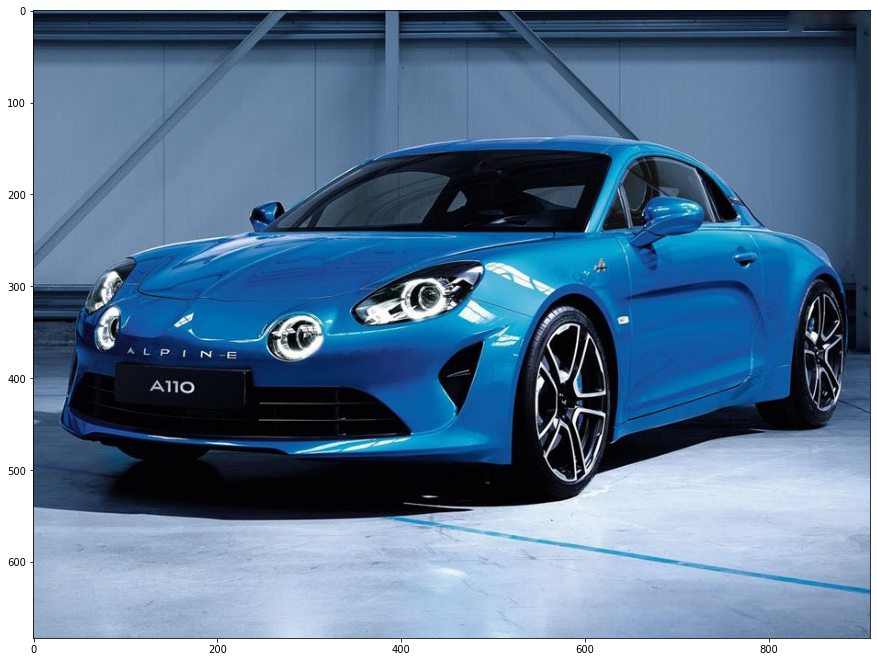

In [15]:
img = img_wm.copy()
img[start[0]:(start[0]+end[0]), start[1]:(start[1]+end[1]), :]=img_b[start[0]:(start[0]+end[0]), start[1]:(start[1]+end[1]), :]
plt.figure(figsize=(15,15))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()